# Naive Bayes and k-means clustering
(NEW CONTINUING)

This is the third notebook in the project

Here it is! The summit on the mountain, the cherry on the sundae, the machine learning on the data science project. This is for both anonymized and non-anonymized writing systems.

In [1]:
import pickle
import pandas as pd
import numpy as np
from numpy import linalg
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia
from sklearn.cluster import KMeans

# Load dataset

In [2]:
f = open('data/chunks.pkl', 'rb')
data = pickle.load(f)
f.close()

In [3]:
data.head()

,text,lang
0,ıwlardı juzege asırıw ushın jirobankler qurıla...,kaa
1,eksas AQSHtin qublashigisinda Atlantika okeani...,kaa
2,asina shekem Kaspiy ham Aral tenizi boylarinan...,kaa
3,rigoriy kestesinde jıldın on birinshi ayı kunn...,kaa
4,andi Ol jili martta Дорогобуж rayoni ushin bol...,kaa


In [4]:
X = data['text']
y = data['lang']

# Baseline Model
Based on https://towardsdatascience.com/an-efficient-language-detection-model-using-naive-bayes-85d02b51cfbd

Train time about 30 min

In [5]:
# set up model, vectorizer
cnt = CountVectorizer(analyzer = 'char',ngram_range=(2,2)) # bigrams
pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',MultinomialNB())
])

In [6]:
# do cross validation
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
clf = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

In [7]:
clf

array([0.9054306 , 0.90592942, 0.90595268, 0.9061146 , 0.90598925])

In [8]:
# get predictions for confusion matrix
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

In [9]:
# make confusion matrix
labels = sorted(y.unique().tolist())
mat = confusion_matrix(y, y_pred, normalize='true', labels=labels)

In [10]:
mat

array([[0.99310777, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.83613244, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.9883    , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00180343, ..., 0.31145176, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.968     ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.61026103]])

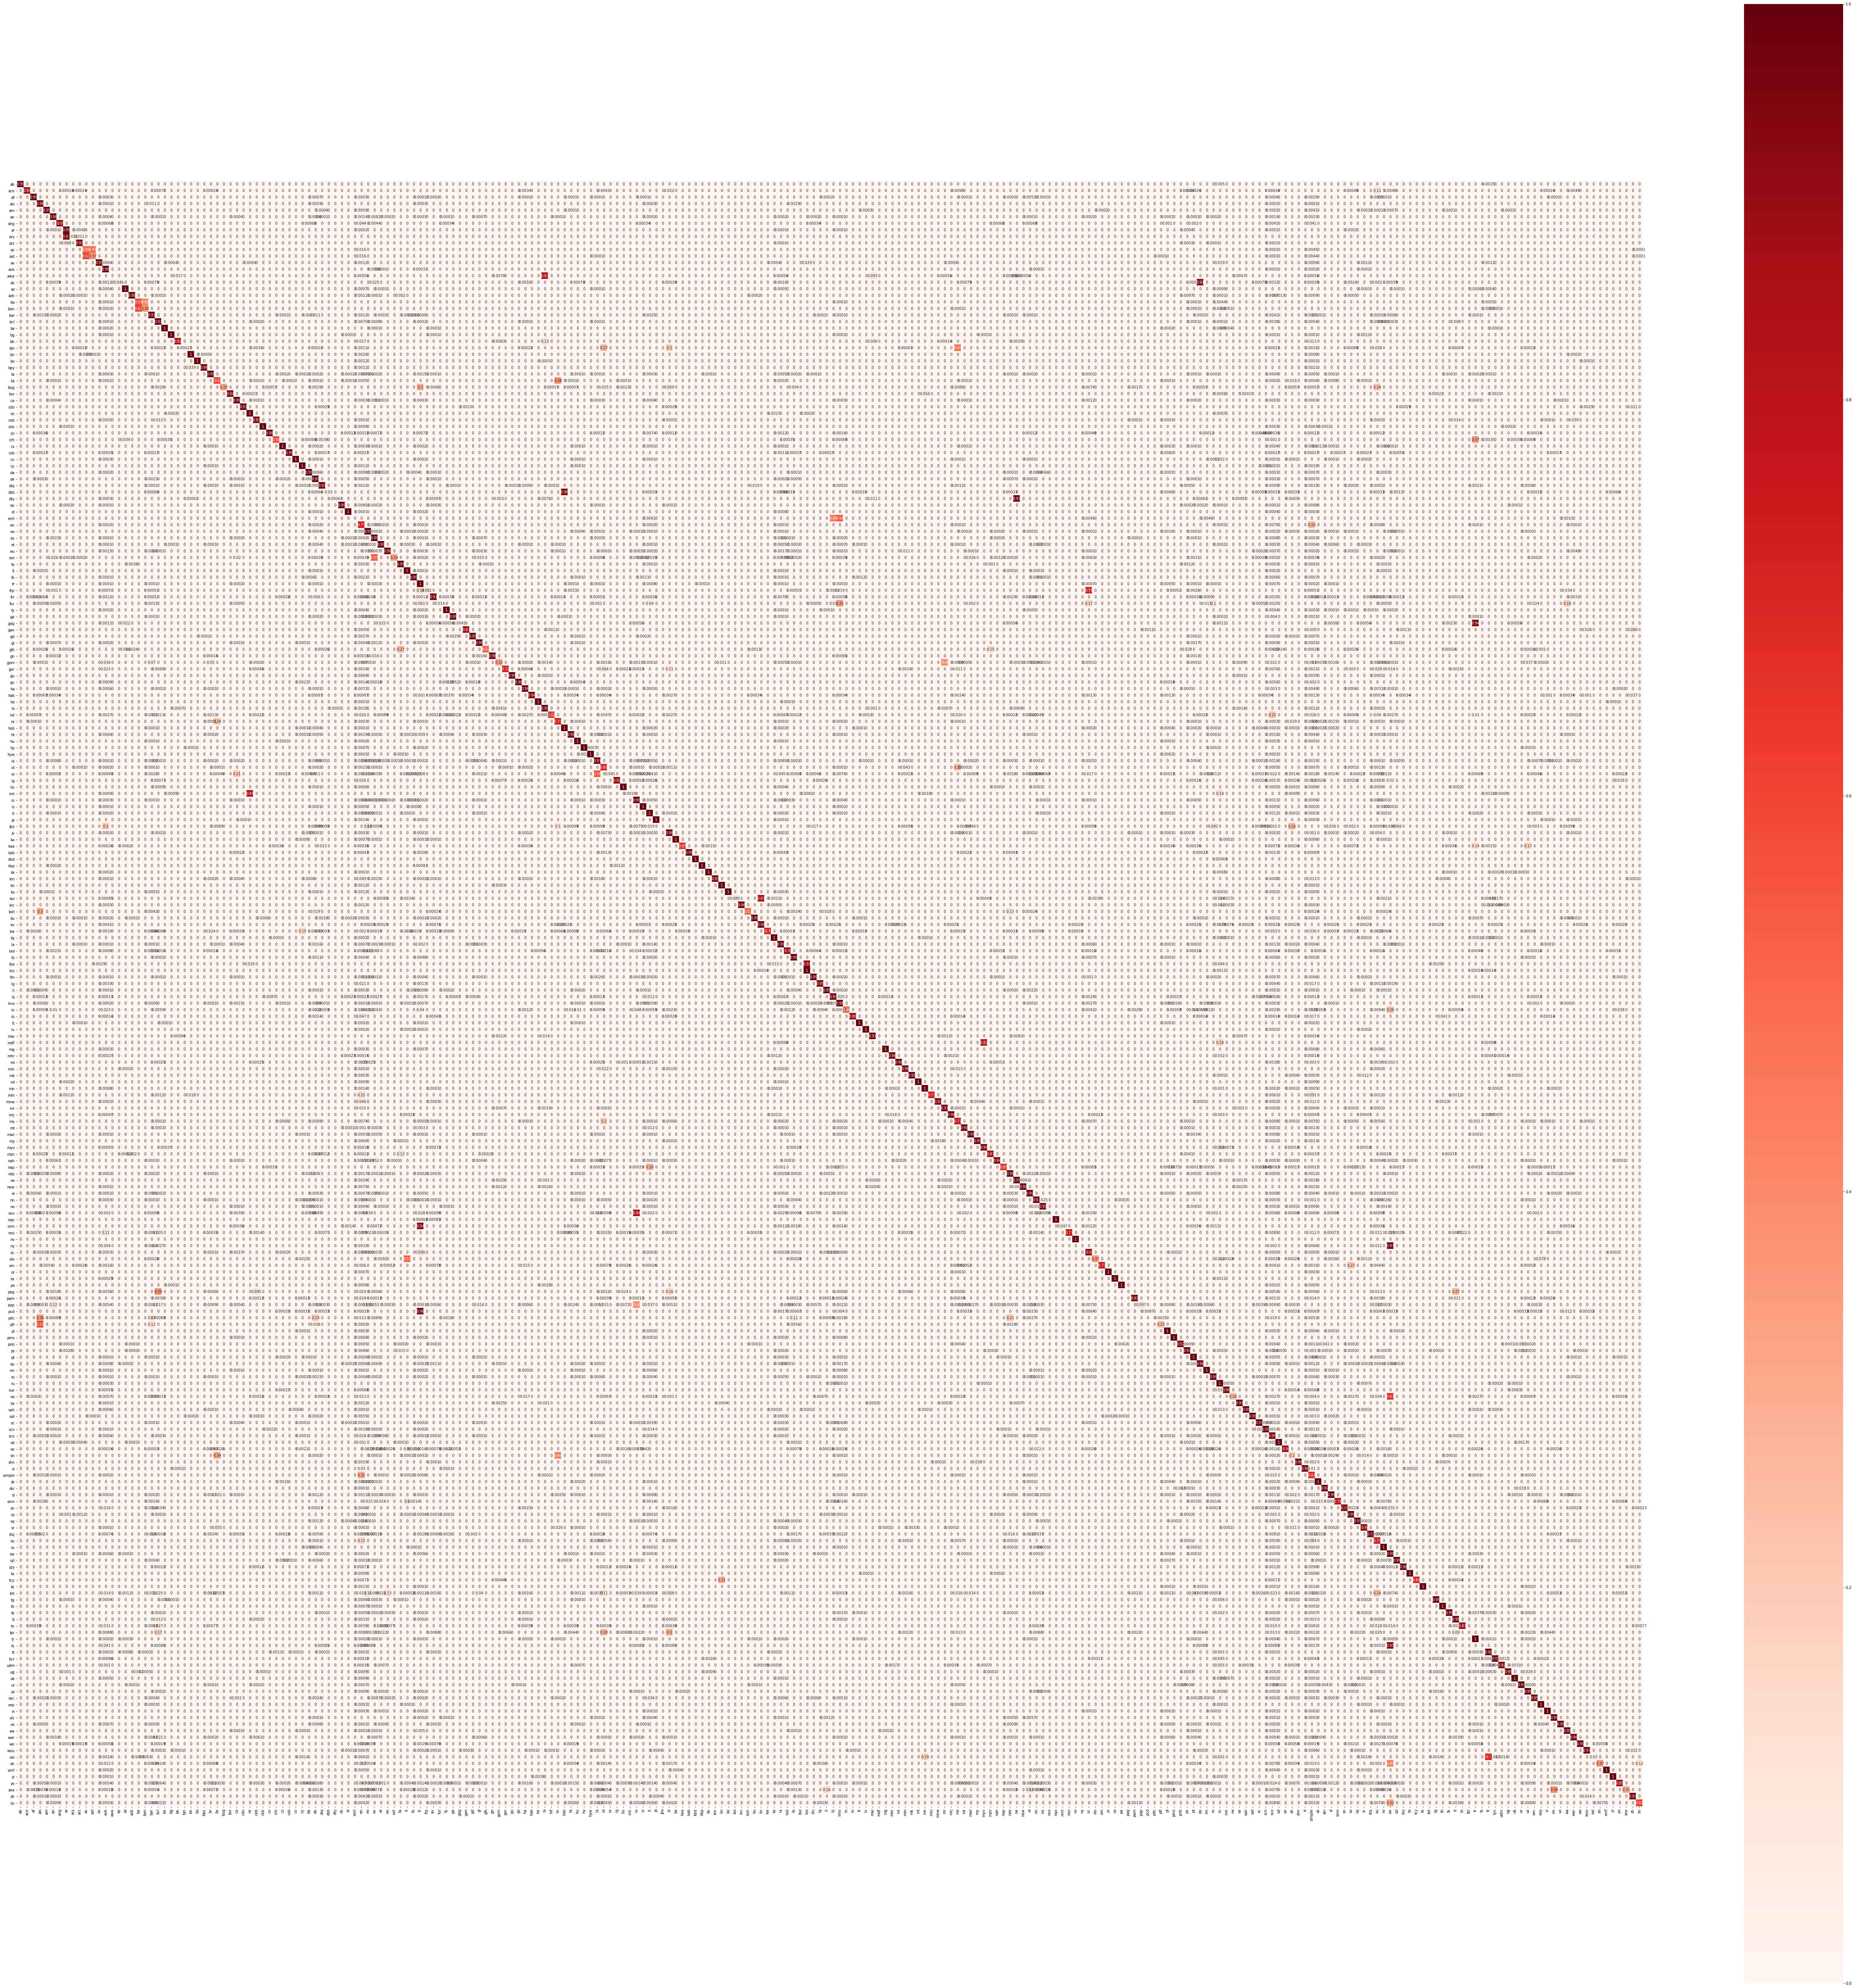

In [11]:
fig, ax = plt.subplots(figsize=(100,100))         
sns.heatmap(mat, square=True, annot=True, cmap="Reds",
           xticklabels=labels, yticklabels=labels, ax=ax)
plt.show()

# Clustering on confusion matrix
Quickly trying what Daniel Zheng did here: https://github.com/Data-Science-for-Linguists/Document_Clustering/blob/master/clustering.ipynb

In [12]:
# make the clusters
from sklearn.cluster import KMeans
num_clusters = 150

km = KMeans(n_clusters=num_clusters)

%time km.fit(mat)

clusters = km.labels_.tolist()

CPU times: user 4.02 s, sys: 34.9 ms, total: 4.06 s
Wall time: 523 ms


In [13]:
# figure out which cluster each language was assigned to 
cluster_titles = dict()
for cluster, title in zip(clusters, labels):
    if cluster not in cluster_titles:
        cluster_titles[cluster] = []
    cluster_titles[cluster].append(wikipedia.languages()[title])

In [14]:
# show the clusters
for cluster, titles in cluster_titles.items():
    print(cluster, ':' , ', '.join(titles), '\n')

94 : Аҧсшәа 

11 : Acèh, Ænglisc, مصرى, भोजपुरी, ᨅᨔ ᨕᨘᨁᨗ, буряад, Mìng-dĕ̤ng-ngṳ̄, qırımtatarca, Esperanto, euskara, 贛語, گیلکی, गोंयची कोंकणी / Gõychi Konknni, Bahasa Hulontalo, 客家語/Hak-kâ-ngî, Fiji Hindi, Igbo, la .lojban., Qaraqalpaqsha, ភាសាខ្មែរ, kernowek, Ladino, Ligure, lingála, ລາວ, Minangkabau, ꯃꯤꯇꯩ ꯂꯣꯟ, ဘာသာ မန်, مازِرونی, Nāhuatl, Napulitano, norsk, Sesotho sa Leboa, Oromoo, Kapampangan, Papiamentu, پنجابی, português, Scots, davvisámegiella, ၽႃႇသႃႇတႆး , සිංහල, anarâškielâ, chiShona, српски / srpski, Seeltersk, Sunda, ತುಳು, tetun, Setswana, тыва дыл, удмурт, ئۇيغۇرچە / Uyghurche, vèneto, isiXhosa, Yorùbá, isiZulu 

109 : Afrikaans 

9 : Alemannisch, Ripoarisch, Deitsch, Pälzisch 

124 : አማርኛ 

110 : aragonés 

51 : العربية, الدارجة 

103 : অসমীয়া, asturianu 

140 : авар 

127 : Kotava 

19 : अवधी, हिन्दी 

22 : Aymar aru, Runa Simi 

79 : azərbaycanca 

72 : تۆرکجه 

20 : башҡортса, Basa Bali 

139 : Boarisch 

7 : Bikol Central, Cebuano, Jawa, Pangasinan, Tagalog, Tok Pisin 

This is great! A few highlights:

- Swahili, Tsonga, Xhosa, Chewa, Kinyarwanda (Bantu)
- French, Norman, Picard (Oïl)
- Persian, Gilaki, Mazanderani (Western Iranian)
- Central Bikol, Cebuano, Javanese, Pangasinan, Tagalog (Malayo-Polynesian), Tok Pisin (English creole)
- Alemannic, Ripuarian, Pennsylvania German, Palatine German (High German)
- Romanian (Balkan Romance), Silesian (West Slavic), Kotava, Lojban (constructed)

# NB with anonymized writing system

In [2]:
f = open('data/chunks_shufanon.pkl', 'rb')
data = pickle.load(f)
f.close()

In [3]:
data['tokens'] = data['text'].map(lambda x: [bytes([elem]) for elem in list(x)])
data.head()

,text,lang,tokens
0,b'\x07\x15\x04\x01\x06\n\x07\x00\x16\x12\x17\x...,kaa,"[b'\x07', b'\x15', b'\x04', b'\x01', b'\x06', ..."
1,b'\x05\x0e\x08\x01\x08\x00\x1a\x1f\x1c7\t\x02\...,kaa,"[b'\x05', b'\x0e', b'\x08', b'\x01', b'\x08', ..."
2,"b""\x01\x08\x02\x03\x01\x00\x08\x13\x05\x0e\x05...",kaa,"[b'\x01', b'\x08', b'\x02', b'\x03', b'\x01', ..."
3,b'\x06\x02\x10\x0b\x06\x02\r\x00\x0e\x05\x08\t...,kaa,"[b'\x06', b'\x02', b'\x10', b'\x0b', b'\x06', ..."
4,b'\x01\x03\n\x02\x00!\x04\x00\x16\x02\x04\x02\...,kaa,"[b'\x01', b'\x03', b'\n', b'\x02', b'\x00', b'..."


In [4]:
X = data['tokens']
y = data['lang']

In [5]:
sum([len(s) for s in X]) / len(X)

499.98372801077244

In [6]:
def dummy_fun(doc):
    return doc

In [7]:
def analyzer(chunk):
    n = 2 #gram size
    grams = []
    for i in range(len(chunk)-n+1):
        grams.append(b''.join(chunk[i:i+n]))
    return grams

In [12]:
# set up model, vectorizer
# FEATURES ARE CHARACTER BIGRAMS
cnt = CountVectorizer(analyzer=analyzer, tokenizer=dummy_fun, preprocessor=dummy_fun, 
                      token_pattern=None, max_features=10)# bigrams
pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',MultinomialNB())
])

In [ ]:
# do cross validation
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
clf = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy', n_jobs=1)
clf

Max features

None: array([0.9995273 , 0.99950118, 0.99948551, 0.99943067, 0.99949334])

2000: array([0.99685822, 0.99696269, 0.99702536, 0.99690261, 0.99703058])

500: array([0.99356497, 0.99355452, 0.99389924, 0.99377649, 0.99374254])

In [ ]:
# get predictions for confusion matrix
y_pred = cross_val_predict(pipeline, X, y, cv=skf)
# make confusion matrix
labels = sorted(y.unique().tolist())
mat = confusion_matrix(y, y_pred, normalize='true', labels=labels)
mat

In [ ]:
f = open('matrix_anonNBbis', 'wb')
pickle.dump(mat, f)
f.close()

### Clustering

In [ ]:
# make the clusters
num_clusters = 150

km = KMeans(n_clusters=num_clusters)

%time km.fit(mat)

clusters = km.labels_.tolist()

In [15]:
# figure out which cluster each language was assigned to 
cluster_titles = dict()
for cluster, title in zip(clusters, labels):
    if cluster not in cluster_titles:
        cluster_titles[cluster] = []
    cluster_titles[cluster].append(wikipedia.languages()[title])

In [16]:
# show the clusters
for cluster, titles in cluster_titles.items():
    print(cluster, ':' , ', '.join(titles), '\n')

3 : Аҧсшәа, Alemannisch, አማርኛ, العربية, الدارجة, অসমীয়া, asturianu, авар, अवधी, تۆرکجه, भोजपुरी, বাংলা, བོད་ཡིག, বিষ্ণুপ্রিয়া মণিপুরী, ᨅᨔ ᨕᨘᨁᨗ, Mìng-dĕ̤ng-ngṳ̄, کوردی, qırımtatarca, ދިވެހިބަސް, Ελληνικά, فارسی, Gagauz, گیلکی, गोंयची कोंकणी / Gõychi Konknni, ગુજરાતી, Hausa, 客家語/Hak-kâ-ngî, हिन्दी, interlingua, Interlingue, ГӀалгӀай, 日本語, ქართული, Qaraqalpaqsha, қазақша, ភាសាខ្មែរ, ಕನ್ನಡ, 한국어, перем коми, къарачай-малкъар, коми, kernowek, Ligure, ລາວ, мокшень, Māori, മലയാളം, монгол, ꯃꯤꯇꯩ ꯂꯣꯟ, ဘာသာ မန်, मराठी, မြန်မာဘာသာ, эрзянь, مازِرونی, नेपाली, नेपाल भाषा, ߒߞߏ, Sesotho sa Leboa, livvinkarjala, Oromoo, ଓଡ଼ିଆ, Ирон, ਪੰਜਾਬੀ, Kapampangan, Picard, پنجابی, پښتو, русиньскый, Kinyarwanda, संस्कृतम्, ᱥᱟᱱᱛᱟᱲᱤ, سنڌي, srpskohrvatski / српскохрватски, ၽႃႇသႃႇတႆး , සිංහල, سرائیکی, slovenščina, Soomaaliga, Seeltersk, Sakizaya, தமிழ், ತುಳು, తెలుగు, тоҷикӣ, ไทย, Türkmençe, татарча/tatarça, тыва дыл, удмурт, ئۇيغۇرچە / Uyghurche, українська, اردو, oʻzbekcha/ўзбекча, 吴语, хальмг, isiXhosa, მარგალური, Yor